<a href="https://colab.research.google.com/github/patrickcunhabr/Data-Science-Sigmoidal/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>Projeto proposto por:</b><br/><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Sua Cidade

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados utilizado foram obtidos atravé do site [Inside Airbnb](http://insideairbnb.com/)







In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-03-18/visualisations/listings.csv")


## Análise dos Dados
Esta etapa tem por objetivo gerar entendimento de como os dados estão estruturados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon',
       'Santa Teresa', 'Centro', 'Gávea', 'Campo Grande', 'Laranjeiras',
       'Humaitá', 'Botafogo', 'Santo Cristo', 'Glória', 'São Conrado',
       'Itanhangá', 'São Cristóvão', 'Lagoa', 'Praça Seca', 'Maracanã',
       'Tijuca', 'São Francisco Xavier', 'Catete', 'Jacarepaguá',
       'Vidigal', 'Marechal Hermes', 'Jardim Botânico', 'Rio Comprido',
       'Recreio dos Bandeirantes', 'Senador Camará', 'Irajá',
       'Vargem Grande', 'Leme', 'Vila da Penha', 'Anil', 'Vargem Pequena',
       'Estácio', 'Grajaú', 'Cosme Velho', 'Gardênia Azul', 'Taquara',
       'Bangu', 'Alto da Boa Vista', 'Urca', 'Joá', 'Penha Circular',
       'Jardim Sulacap', 'Praça da Bandeira', 'Encantado',
       'Lins de Vasconcelos', 'Cosmos', 'Santíssimo', 'Gamboa',
       'Bonsucesso', 'Camorim', 'Piedade', 'Olaria', 'Vila Valqueire',
       'Cidade de Deus', 'Riachuelo', 'Barra de Guaratiba',
       'Padre Miguel', 'Méier', 'Andaraí'

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36085
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

*  É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
*  As variáveis reviews_per_month e last_review possuem valores nulos em quase metade das linhas.
*  
As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.404379
last_review                       0.404379
name                              0.001607
host_name                         0.000305
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

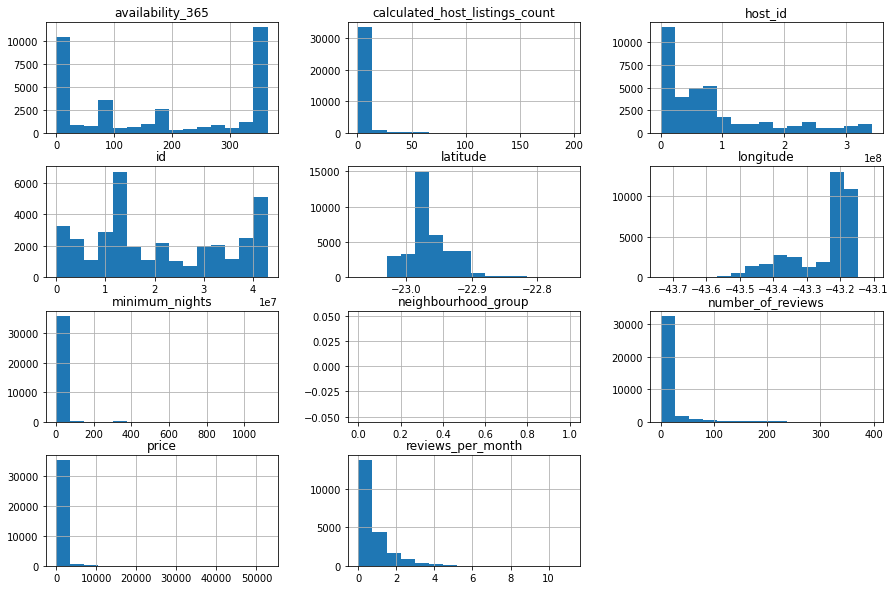

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

***Há outliers presentes?***

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.

In [11]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36085.000000,36085.000000,36085.000000,21493.000000,36085.000000,36085.000000
mean,683.304115,4.644894,9.880726,0.757547,6.215131,179.809090
std,1922.401326,21.758753,25.824381,0.931326,20.685230,151.719466
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,157.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,299.000000,2.000000,1.000000,0.390000,1.000000,173.000000
75%,599.000000,4.000000,6.000000,1.000000,3.000000,360.000000
max,52763.000000,1123.000000,397.000000,11.110000,196.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 599, porém seu valor máximo é 40000.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights


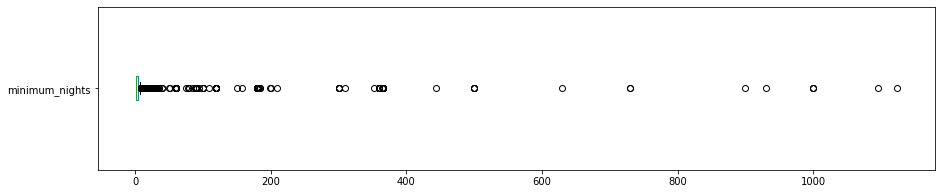

214 valores acima de 30 entradas
0.5930%


In [67]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("{} valores acima de 30 entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

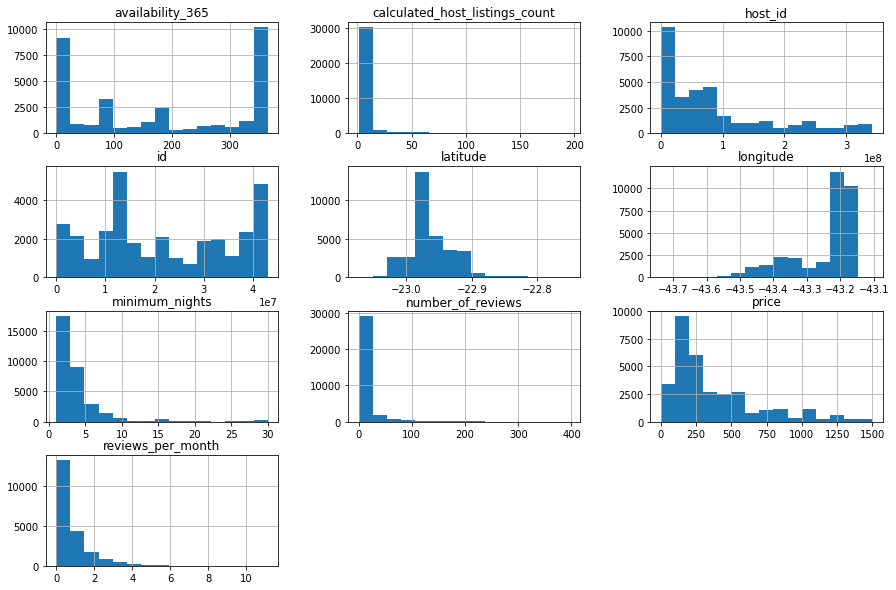

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### Q4. Qual a média dos preços de aluguel?

Identificamos outliers nas variável price, vamos agora limpar o DataFrame e descobrir a média


In [52]:
# ver a média da coluna `price``
print("Média:", "R$ {:.2f}".format(df[df.price < 1500].price.mean()))

print("Média sem a limpeza:", "R$ {:.2f}".format(df.price.mean()))


Média: R$ 367.92
Média sem a limpeza: R$ 683.30


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [53]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.187525,-0.162844,-0.154950,0.009895,-0.022694
minimum_nights,0.187525,1.000000,-0.083217,-0.132254,-0.041872,-0.015602
number_of_reviews,-0.162844,-0.083217,1.000000,0.546967,-0.025400,0.046675
reviews_per_month,-0.154950,-0.132254,0.546967,1.000000,-0.017430,-0.023866
calculated_host_listings_count,0.009895,-0.041872,-0.025400,-0.017430,1.000000,0.064232
availability_365,-0.022694,-0.015602,0.046675,-0.023866,0.064232,1.000000


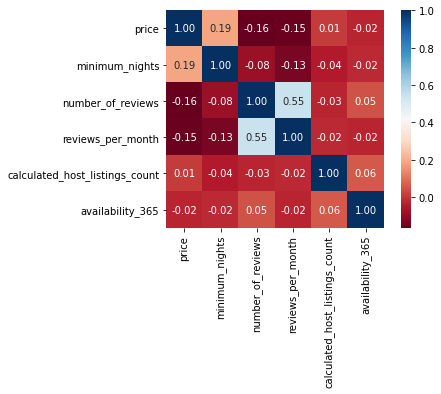

In [54]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().italicized text

In [55]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22689
Private room        9048
Shared room          785
Hotel room           165
Name: room_type, dtype: int64

In [56]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.694129
Private room       0.276807
Shared room        0.024016
Hotel room         0.005048
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [58]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  855.333333
Ricardo de Albuquerque    587.200000
Lagoa                     509.587349
Leblon                    475.855021
Deodoro                   475.500000
Anchieta                  474.400000
Abolição                  472.666667
Jacarepaguá               462.912654
Barra da Tijuca           460.724043
Engenho de Dentro         451.788732
Name: price, dtype: float64

Acima, vemos que a comunidade Complexo do Alemão está com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Complexo do Alemão.

In [59]:
# ver quantidade de imóveis no Complexo do Alemão
print(df[df.neighbourhood == "Complexo do Alemão"].shape)

# ver as 4 entradas do Complexo do Alemão
df[df.neighbourhood == "Complexo do Alemão"]

(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18148,17148972,Casa Brota,101966262,Thamyra,NaN,Complexo do Alemão,-22.85692,-43.27611,Private room,41,1,6,2018-10-07,0.16,1,90
19836,21090668,Be a Carioca in our Guesthouse,10459831,Ozomatli,NaN,Complexo do Alemão,-22.86792,-43.27700,Shared room,51,1,3,2018-03-07,0.11,4,90
20085,21448656,Casa 1 quarto alem,155642978,Felipe,NaN,Complexo do Alemão,-22.85954,-43.27623,Shared room,599,1,1,2017-11-28,0.04,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

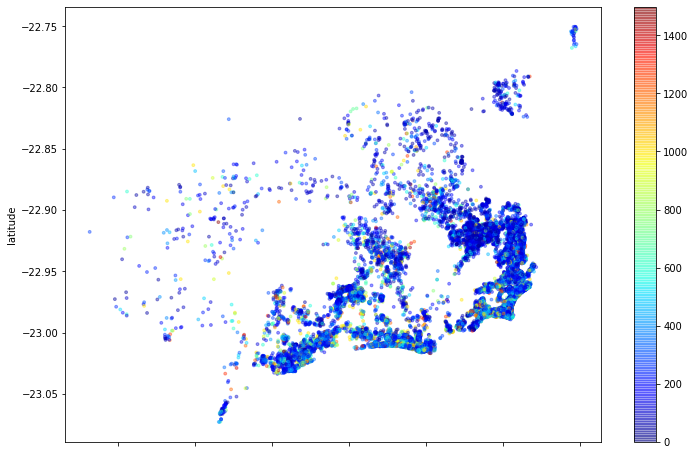

In [60]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [64]:
# ver a média da coluna `minimum_nights`
print("Média:", df[df.minimum_nights < 15].minimum_nights.mean())

Média: 2.8839526195372005


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.